# Sensor on leg
Purpose of this experiment is to survey a motion of the skateboard during a skateboard trick called **Ollie**. I measure two physical quantities: gyroscope speed [rad/s] and acceleration [m/s^2]. Each quantity is represented by its x,y,z component. A smartphone and its app Phyphox works as a sensor estimating and calculating the movement and provides data to xls files. The smartphone was stuck on my leg. I made ten attempts.

The script that is processing data is written in Python. I use popular libraries such as: Pandas, NumPy, and Matplolib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Experiment consists of 10 measurements. 

In [2]:
video_time = {
    "Exp1" : "0.19",
    "Exp2" : "1.20",
    "Exp3" : "2:20",
    "Exp4(5)" : "3:07",
    "Exp5" : "4:20",
    "Exp6(7)" : "5:35",
    "Exp7(8)" : "6:30",
    "Exp8(9)" : "7:15",
    "Exp9(10)" : "7:55",
    "Exp10(11)" : "8:35 "
}

URL_keys_leg = {
    "Exp2" : '1u2JN_yVS9I-aDDk-xtRFLs9SDdrUNo0f',
    "Exp3" : '1qolBHxLSiGi-bmDUZ-V0WzaCay7UaA3x',
    "Exp4(5)" : '1eEh3oZpFoCo4dGdcVoGH6kuwIe7QY6rr',
    "Exp5" : '1P3E_T65CdJncewSVA-3H8hveejoqcdy4',
    "Exp6(7)" : '1kFniM6vHQVy659t0I4R86xH6bfGgo97K',
    "Exp7(8)" : '19j6veOIvJoe3aln1MURMChglvMA2F5AS',
    "Exp8(9)" : '1akmRWg8bhkKlAQV0XimEPTzsa7_UvazU',
    "Exp9(10)" : '1llYUn_deIMOUQl14-aJL9Gw5BqT3nH53',
    "Exp10(11)" : '1hdnEeKw7eb2bEvJLbtd12irF3N5qIFmc'
}

Each attempt takes 20 seconds, but only 2-3 seconds are vital. Following "ranges" focus on the most critical data for further analysis.

In [3]:
ranges = {
#    "Exp2" : [500,900],
    "Exp2" : [300,900],
    "Exp3" : [600,1000],
    "Exp4(5)" : [300,1000],
#    "Exp4(5)" : [745,765],
    "Exp5" : [300,1000],
#    "Exp5" : [740,760],
    "Exp6(7)" : [300,1000],
#    "Exp7(8)" : [550,950],
    "Exp7(8)" : [300,1000],    
    "Exp8(9)" : [300,1100],
#    "Exp8(9)" : [820,850],
    "Exp9(10)" : [1250,1750],
    "Exp10(11)" : [300,1100]
}

classification = {
    "Exp2" : "good",
    "Exp3" : "bad",
    "Exp4(5)" : "good",
    "Exp5" : "good",
    "Exp6(7)" : "bad",
    "Exp7(8)" : "good",
    "Exp8(9)" : "good",
    "Exp9(10)" : "bad",
    "Exp10(11)" : "good"
}

This script downloads data from Google Sheets, converts headers and plots data into the graphs. Each attempt has two graphs: Gyroscope and Accelerometer. 

In [4]:
def import_from_google (ID,name):
    google_sheet_ID=ID
    work_sheet=name
    path='https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
        google_sheet_ID,
        work_sheet
    )

    data = pd.read_csv(path)
    
    if name=="Gyroscope":
        data.columns = [c.replace(' ', '_') for c in data.columns]
        data.columns = [c.replace('_(rad/s)', '') for c in data.columns]
        data.columns = [c.replace('_(s)', '') for c in data.columns]
    else:
        data.columns = [c.replace(' ', '_') for c in data.columns]
        data.columns = [c.replace('_(m/s^2)', '') for c in data.columns]
        data.columns = [c.replace('_(s)', '') for c in data.columns]
    
    return data

def print_graph (prefix,title,graphdata):
    plt.figure(figsize=(15,5))
    if title=="Gyroscope":
        title=prefix+" "+title
        plt.title(title)
        plt.ylim(-6,6)
        plt.plot(graphdata.Time, graphdata.Gyroscope_x, color="red")
        plt.plot(graphdata.Time, graphdata.Gyroscope_y, color="blue")
        plt.plot(graphdata.Time, graphdata.Gyroscope_z, color="green")
        plt.show()
        
    if title=="Accelerometer":
        title=prefix+" "+title
        plt.title(title)
        plt.plot(graphdata.index, graphdata.Acceleration_x, color="red")
        plt.plot(graphdata.index, graphdata.Acceleration_y, color="blue")
        plt.plot(graphdata.index, graphdata.Acceleration_z, color="green")
        plt.show()
        
    else:
        print("NONE")

-------------- Experiment  Exp2 -------------
quality= good
max= 39.22181320000001
min= -37.30286026
idx max= 639
idx min= 658
delta time= 0.18998458600000045


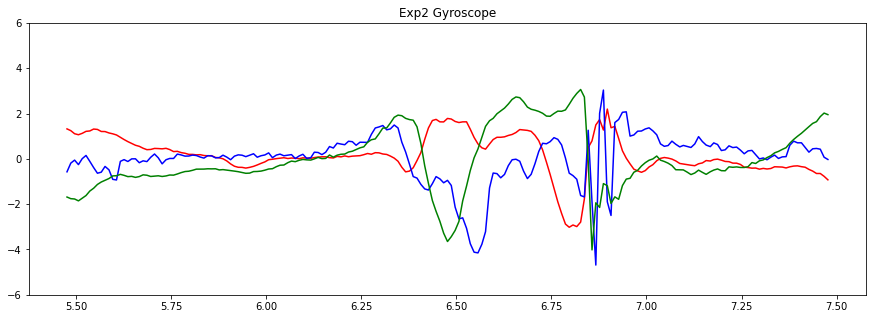

NONE


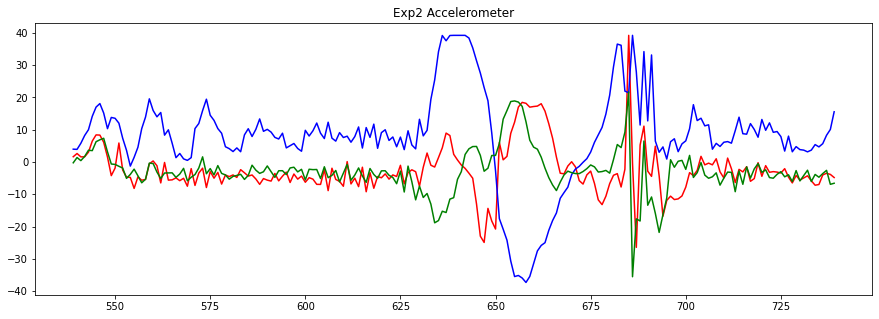

-------------- Experiment  Exp4(5) -------------
quality= good
max= 39.22181320000001
min= -37.33638
idx max= 757
idx min= 812
delta time= 0.5504225449999991


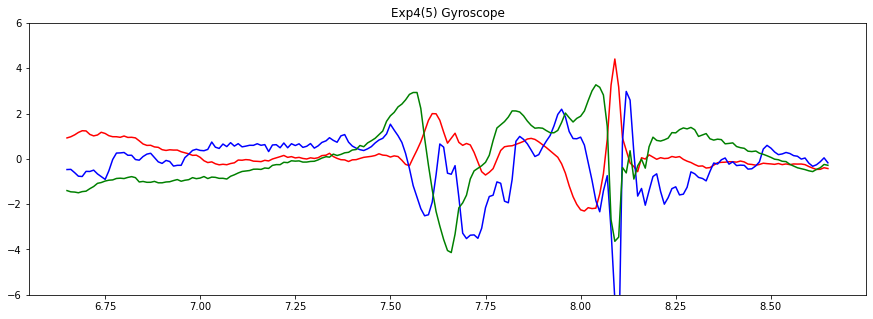

NONE


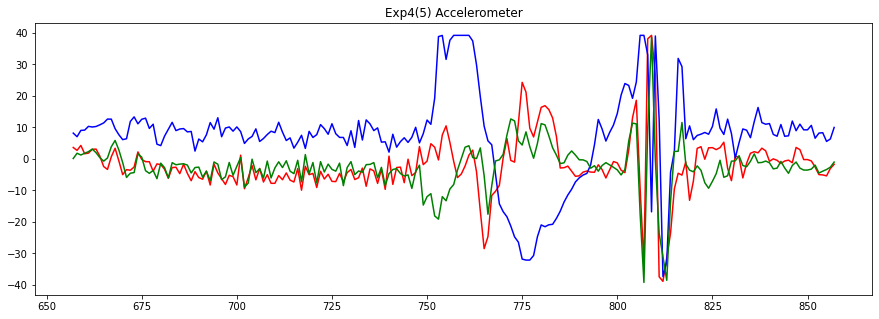

-------------- Experiment  Exp5 -------------
quality= good
max= 39.22181320000001
min= -31.85006523
idx max= 753
idx min= 776
delta time= 0.22996900000000053


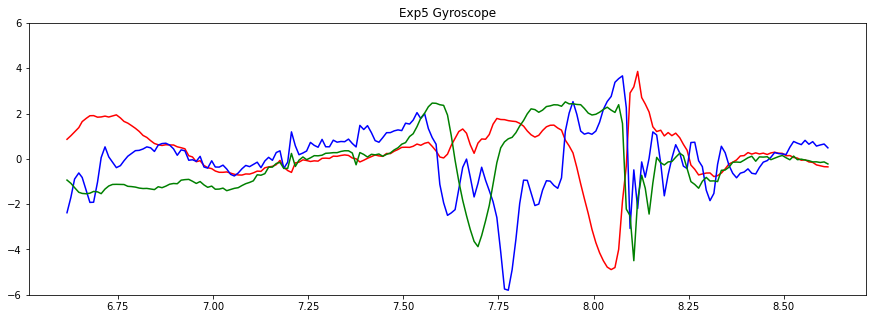

NONE


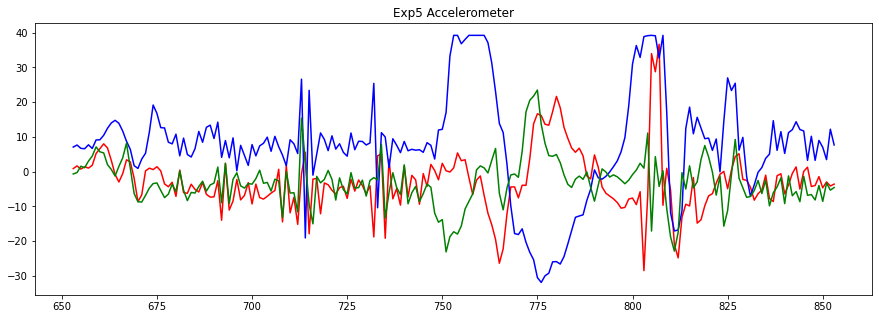

-------------- Experiment  Exp7(8) -------------
quality= good
max= 39.22181320000001
min= -37.64882278
idx max= 698
idx min= 752
delta time= 0.54009412


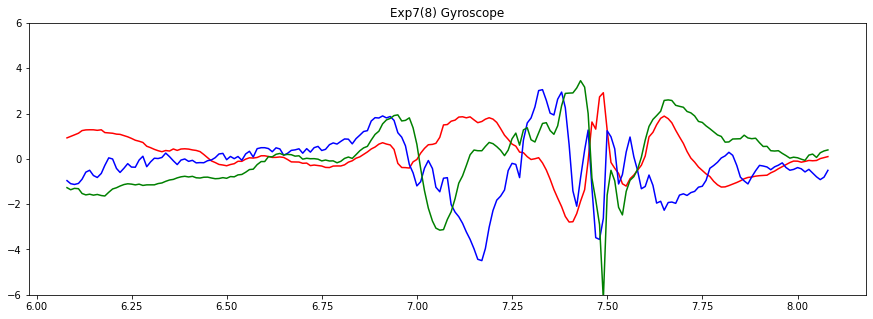

NONE


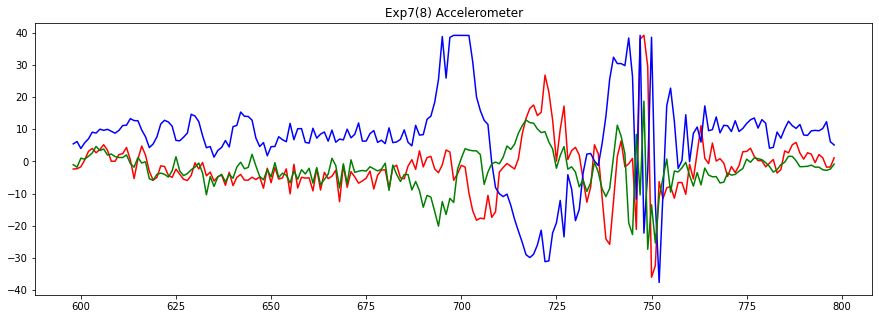

-------------- Experiment  Exp8(9) -------------
quality= good
max= 39.22181320000001
min= -36.41461182
idx max= 841
idx min= 856
delta time= 0.14984300000000061


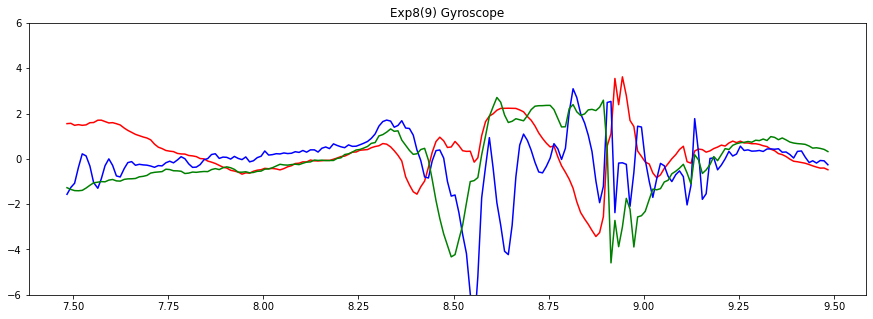

NONE


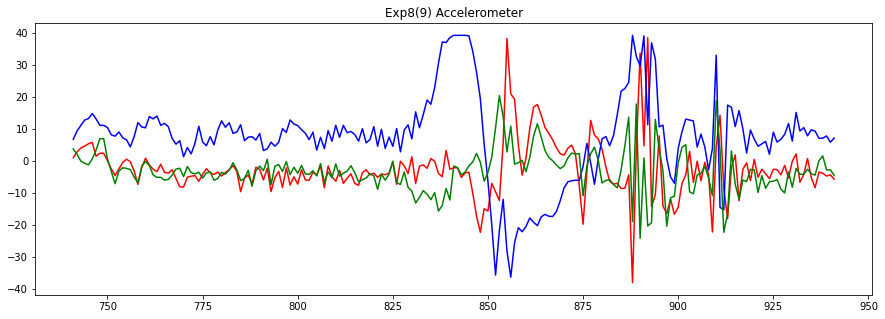

-------------- Experiment  Exp10(11) -------------
quality= good
max= 39.22181320000001
min= -30.1094799
idx max= 838
idx min= 858
delta time= 0.2000580000000003


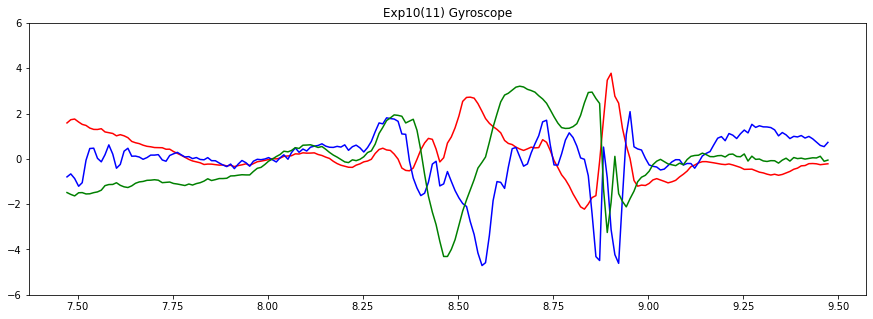

NONE


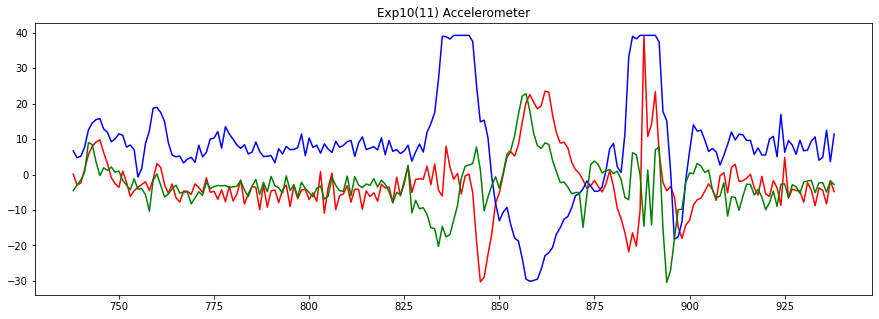

In [5]:
for i in URL_keys_leg:
    if classification[i]=="good":
        data_gyr = import_from_google(URL_keys_leg[i],"Gyroscope")
        data_acc = import_from_google(URL_keys_leg[i],"Accelerometer")

        data_acc.loc[:,"Diff_y"]=data_acc.loc[:,'Acceleration_y'].diff(periods=-10)
        
        max_acc=data_acc["Acceleration_y"].max()
        min_acc=data_acc["Acceleration_y"].min()
        idx_max_acc=data_acc["Acceleration_y"].idxmax()
        idx_min_acc=data_acc["Acceleration_y"].idxmin()
        delta_time=data_acc.loc[idx_min_acc,"Time"]-data_acc.loc[idx_max_acc,"Time"]

        print("-------------- Experiment ",i,"-------------")
        print("quality=",classification[i])
        print("max=",max_acc)
        print("min=",min_acc)
        print("idx max=",idx_max_acc)
        print("idx min=",idx_min_acc)
        print("delta time=",delta_time)
    
        graphdata_gyr=data_gyr.loc[idx_max_acc-100:idx_max_acc+100,:]
        graphdata_acc=data_acc.loc[idx_max_acc-100:idx_max_acc+100,:]
        
        print_graph(i,"Gyroscope",graphdata_gyr)
        print_graph(i,"Accelerometer",graphdata_acc)
  

